# PLE02: Preparación de los datos

## Análisis EDA simple

### Realizado por Víctor Vega Sobral

En este notebook se implementarán las funciones necesarias para hacer una preparación y análisis de los datos mediante un EDA simple

In [1]:
# Importación de las bibliotecas necesarias 
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler



#### Carga de los datos

In [2]:
# Carga de los datos del csv 
df = pd.read_csv('ple02_gimnasio.csv', index_col = 0)

# Verificar la estructura del dataframe
print(f"Dimensiones del dataframe completo {df.shape}")

# Inspección de los primeros registros del dataframe 
print("Primeros registros del dataset completo")
print(df.head())


Dimensiones del dataframe completo (973, 14)
Primeros registros del dataset completo
     Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
Age                                                                   
56     Male         88.3        1.71      180      157           60   
46   Female         74.9        1.53      179      151           66   
32   Female         68.1        1.66      167      122           54   
25     Male         53.2        1.70      190      164           56   
38     Male         46.1        1.79      188      158           68   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
Age                                                                           
56                       1.69           1313.0         Yoga            12.6   
46                       1.30            883.0         HIIT            33.9   
32                       1.11            677.0       Cardio            33.4   
25                    

#### Estructura de los datos
1. Conjunto de los datos
2. Tipos de los datos


In [3]:
# Número de filas y columnas

num_filas, num_columnas = df.shape[0] , df.shape[1]

mensaje = f"""
\n ****** NUMERO DE FILAS/COLUMNAS ******\n

 El numero de filas es de {num_filas + 1} \n
 El numero de columnas es de {num_columnas + 1}

"""
print(mensaje)







 ****** NUMERO DE FILAS/COLUMNAS ******


 El numero de filas es de 974 

 El numero de columnas es de 15




In [4]:
# Tipos de datos
print("\n ******TIPOS DE DATOS****** \n")
print(df.dtypes)


 ******TIPOS DE DATOS****** 

Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


Dado que los nombres de las variables son bastante representativos, no es necesario hacer una adaptación de estos.

Además, de estas líneas de código se extraen las siguientes conclusiones:

1. **Número de filas y columnas**: el dataset tiene 973 filas y 14 columnas.
No obstante, le sumamos uno a este número debido a que la cuenta comienza en 0, y podría ser confuso para una persona que no conozca este apunte.
2. **Tipos de variables**:
    - Float64
    - int
    - Object

#### Estadísticas descriptivas

1. Identificación de variables numéricas y categóricas.

2. Resumen general de las variables numéricas

#### Transformación de variables categóricas numéricas

In [5]:


# Convertir la variable 'Gender' en variables dummy y eliminar una columna para evitar multicolinealidad
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Convertir la variable 'Workout_Type' en variables dummy y eliminar tres columnas para evitar multicolinealidad
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

# Cambiar los booleanos True False a 0 y 1

boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)


# Mostrar las primeras filas del DataFrame para verificar las conversiones
df.head()

,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
Age,,,,,,,,,,,,,,,,
56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,0,0,1
46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1,0,0
32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0,0,0
25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,0,1,0
38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,0,1,0


In [6]:
print("Resumen estadístico de las variables numéricas: \n ", df.describe())



Resumen estadístico de las variables numéricas: 
         Weight (kg)  Height (m)     Max_BPM     Avg_BPM  Resting_BPM  \
count   973.000000   973.00000  973.000000  973.000000   973.000000   
mean     73.854676     1.72258  179.883864  143.766701    62.223022   
std      21.207500     0.12772   11.525686   14.345101     7.327060   
min      40.000000     1.50000  160.000000  120.000000    50.000000   
25%      58.100000     1.62000  170.000000  131.000000    56.000000   
50%      70.000000     1.71000  180.000000  143.000000    62.000000   
75%      86.000000     1.80000  190.000000  156.000000    68.000000   
max     129.900000     2.00000  199.000000  169.000000    74.000000   

       Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count                973.000000       973.000000      973.000000   
mean                   1.256423       905.422405       24.976773   
std                    0.343033       272.641516        6.259419   
min                    0.500000      

In [7]:
# Seleccionar las columnas con variables numéricas

df_numerico = df.select_dtypes(include = [np.number])

media = df_numerico.mean()
mediana = df_numerico.median()
val_min = df_numerico.min()
val_max = df_numerico.max()
des_estandar= df_numerico.std()
conteo= df_numerico.count()


mensaje_media = f"""A continuación se muestra la Media:
 
{media}
\n
"""
print(mensaje_media)


A continuación se muestra la Media:
 
Weight (kg)                       73.854676
Height (m)                         1.722580
Max_BPM                          179.883864
Avg_BPM                          143.766701
Resting_BPM                       62.223022
Session_Duration (hours)           1.256423
Calories_Burned                  905.422405
Fat_Percentage                    24.976773
Water_Intake (liters)              2.626619
Workout_Frequency (days/week)      3.321686
Experience_Level                   1.809866
BMI                               24.912127
Gender_Male                        0.525180
Workout_Type_HIIT                  0.227133
Workout_Type_Strength              0.265159
Workout_Type_Yoga                  0.245632
dtype: float64





**Valores de las medias**

- El **peso medio** de los clientes del gimnasio es de 73.8kg, con una **altura** de 1.72m.
- Las **pulsaciones por minuto** son:
    - **Valor máximo**: 179 pulsaciones por minuto.
    - **Valor medio**:143 pulsaciones por minuto.
    - **Valor en reposo**: 62 pulsaciones por minuto.

- La **duración de la sesión** es de 1.26 horas, con unas **calorías quemadas** de 905.
- EL **porcentaje graso** es de 24.9.
- La **ingesta de agua** es de 2.62 litros, con una **frecuencia de entrenamiento** de 3.32 días a la semana.
- El **nivel de experiencia** es de 1.8, con un **índice de masa corporal de 24.9** 

In [8]:
mensaje_mediana = f"""
Mediana: 
{mediana}
\n

"""

print(mensaje_mediana)


Mediana: 
Weight (kg)                       70.00
Height (m)                         1.71
Max_BPM                          180.00
Avg_BPM                          143.00
Resting_BPM                       62.00
Session_Duration (hours)           1.26
Calories_Burned                  893.00
Fat_Percentage                    26.20
Water_Intake (liters)              2.60
Workout_Frequency (days/week)      3.00
Experience_Level                   2.00
BMI                               24.16
Gender_Male                        1.00
Workout_Type_HIIT                  0.00
Workout_Type_Strength              0.00
Workout_Type_Yoga                  0.00
dtype: float64






**Valores de las medianas**

- El **peso mediano** de los clientes del gimnasio es de 70kg, con una **altura** de 1.71m.
- Las **pulsaciones por minuto** son:
    - **Valor máximo**: 180 pulsaciones por minuto.
    - **Valor medio**:143 pulsaciones por minuto.
    - **Valor en reposo**: 62 pulsaciones por minuto.

- La **duración de la sesión** es de 1.26 horas, con unas **calorías quemadas** de 893.
- EL **porcentaje graso** es de 26.20.
- La **ingesta de agua** es de 2.6 litros, con una **frecuencia de entrenamiento** de 3 días a la semana.
- El **nivel de experiencia** es de 2, con un **índice de masa corporal de 24.16** 


In [9]:
otros_mensajes = f"""Valor mínimo: 
{val_min}
\n
Valor máximo: 
{val_max}
\n
Desviación estándar: 
{des_estandar}
\n
Conteo de valores no nulos: 
{conteo}"""
print(otros_mensajes)

Valor mínimo: 
Weight (kg)                       40.00
Height (m)                         1.50
Max_BPM                          160.00
Avg_BPM                          120.00
Resting_BPM                       50.00
Session_Duration (hours)           0.50
Calories_Burned                  303.00
Fat_Percentage                    10.00
Water_Intake (liters)              1.50
Workout_Frequency (days/week)      2.00
Experience_Level                   1.00
BMI                               12.32
Gender_Male                        0.00
Workout_Type_HIIT                  0.00
Workout_Type_Strength              0.00
Workout_Type_Yoga                  0.00
dtype: float64


Valor máximo: 
Weight (kg)                       129.90
Height (m)                          2.00
Max_BPM                           199.00
Avg_BPM                           169.00
Resting_BPM                        74.00
Session_Duration (hours)            2.00
Calories_Burned                  1783.00
Fat_Percentage            

#### Distribución de las variables 

In [10]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Seleccionar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Generar gráficos de caja para columnas numéricas
for columna in columnas_numericas:
    fig = px.box(df, y=columna)
    fig.update_layout(
        title=f'Gráfico de caja para {columna}',
        yaxis_title=columna,
        xaxis_title='Categoría'
    )
    fig.show()

### Correlación entre variables 

In [11]:
# Generar gráficos de violín para cada variable
for col in columnas_numericas:
    fig = px.violin(
        df, 
        y=col, 
        box=True, 
        points="all",
        title=f'Gráfico de violín para {col}',
        labels={col: col}
    )
    fig.show()




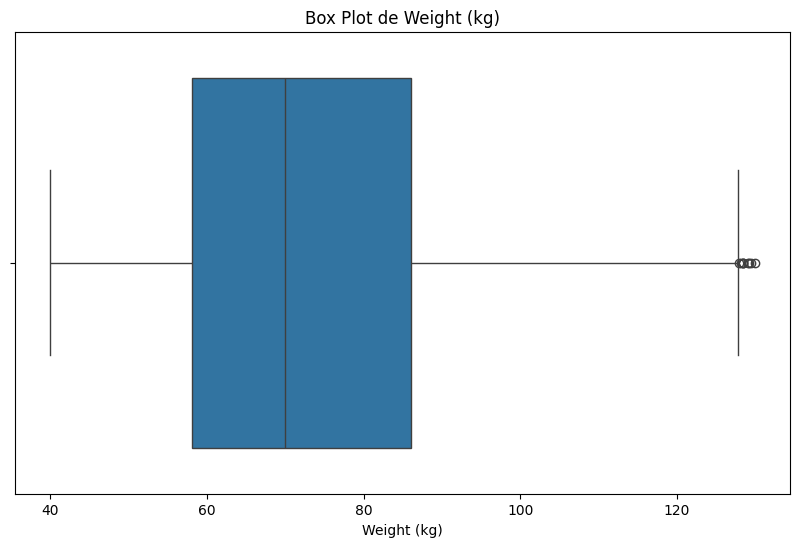

Valores atípicos en Weight (kg):
Age
56    129.0
56    129.5
20    128.2
20    128.4
55    128.4
55    129.9
28    128.4
19    127.9
48    129.2
Name: Weight (kg), dtype: float64



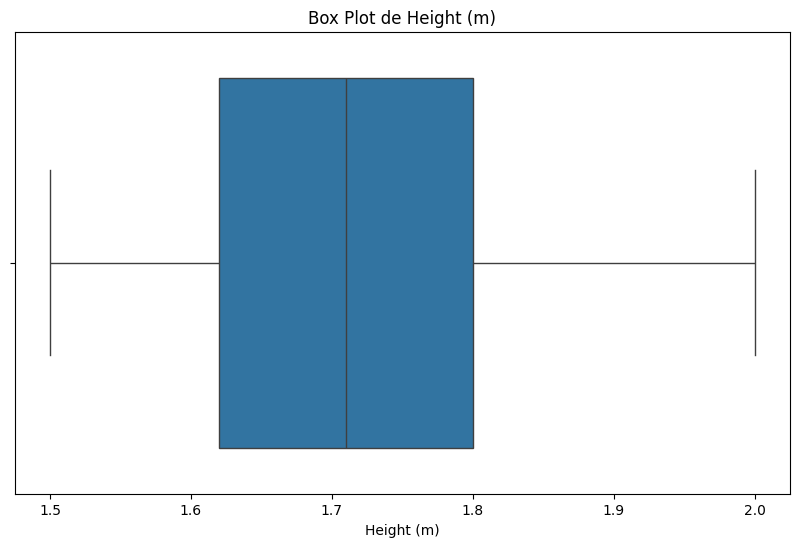

Valores atípicos en Height (m):
Series([], Name: Height (m), dtype: float64)



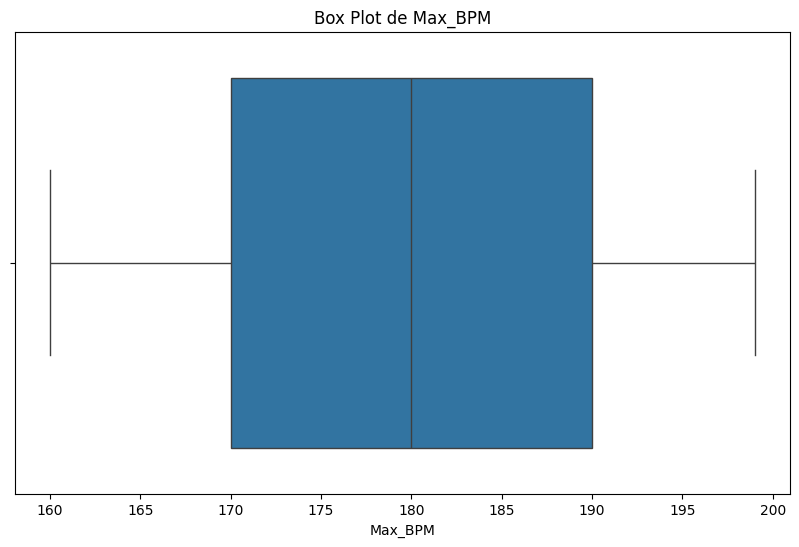

Valores atípicos en Max_BPM:
Series([], Name: Max_BPM, dtype: int64)



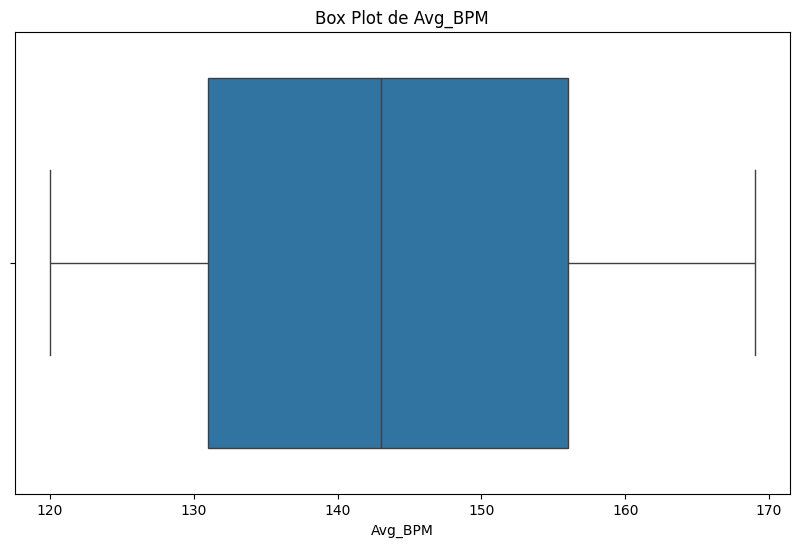

Valores atípicos en Avg_BPM:
Series([], Name: Avg_BPM, dtype: int64)



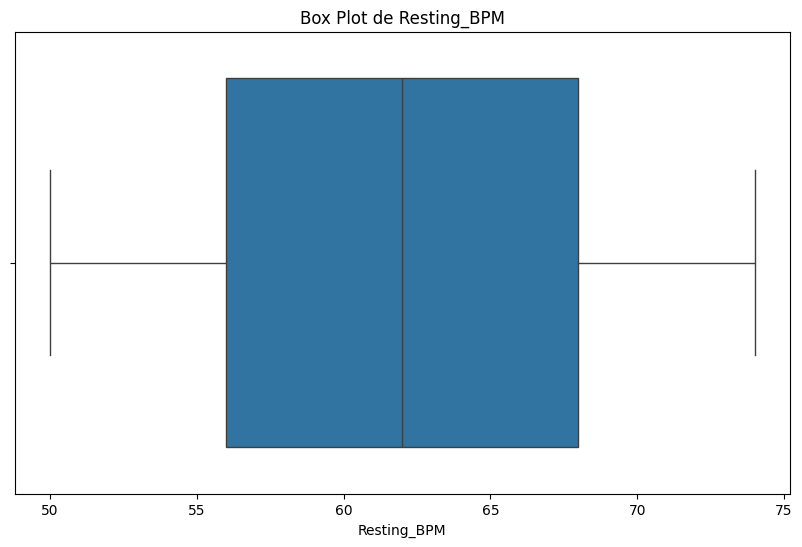

Valores atípicos en Resting_BPM:
Series([], Name: Resting_BPM, dtype: int64)



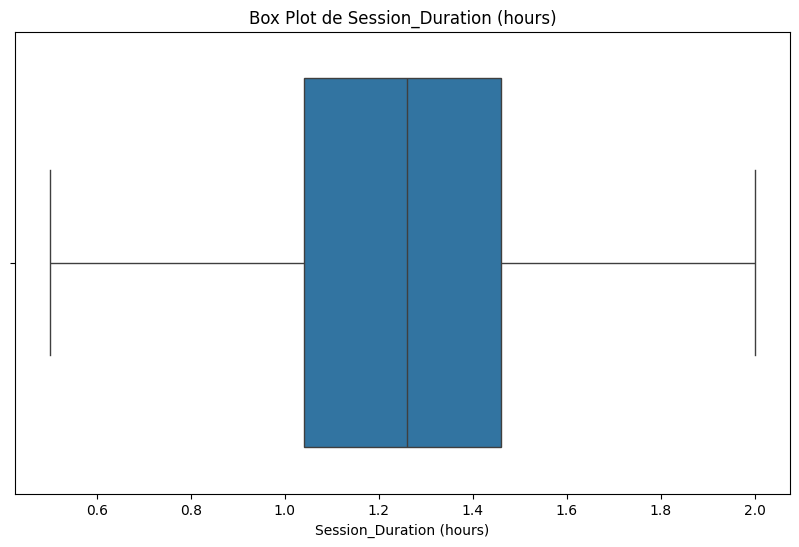

Valores atípicos en Session_Duration (hours):
Series([], Name: Session_Duration (hours), dtype: float64)



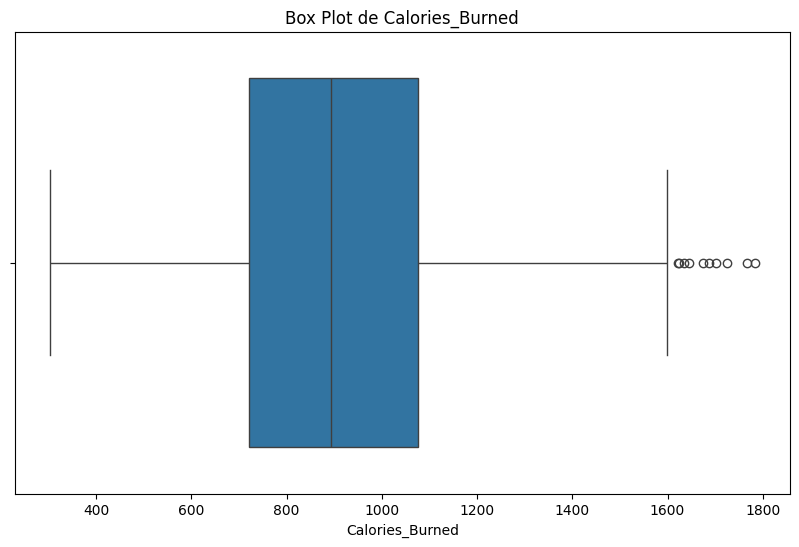

Valores atípicos en Calories_Burned:
Age
25    1688.0
24    1625.0
26    1701.0
27    1622.0
39    1725.0
36    1646.0
22    1675.0
19    1766.0
47    1634.0
32    1783.0
Name: Calories_Burned, dtype: float64



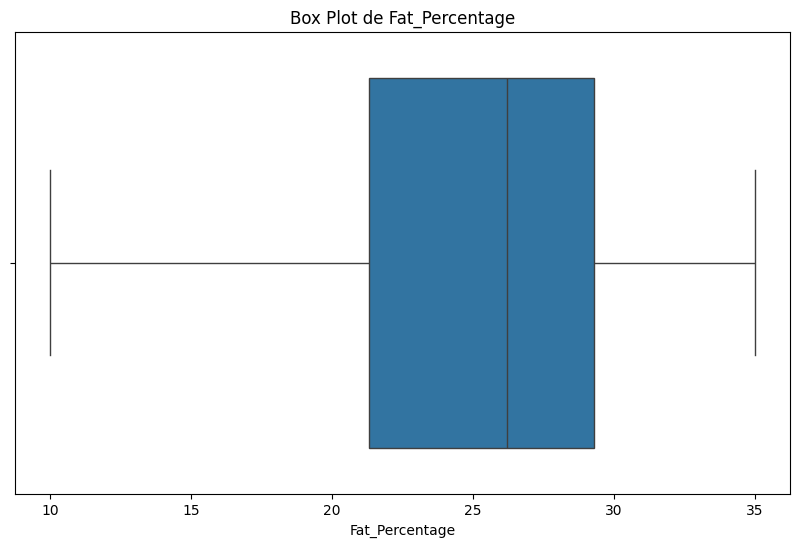

Valores atípicos en Fat_Percentage:
Series([], Name: Fat_Percentage, dtype: float64)



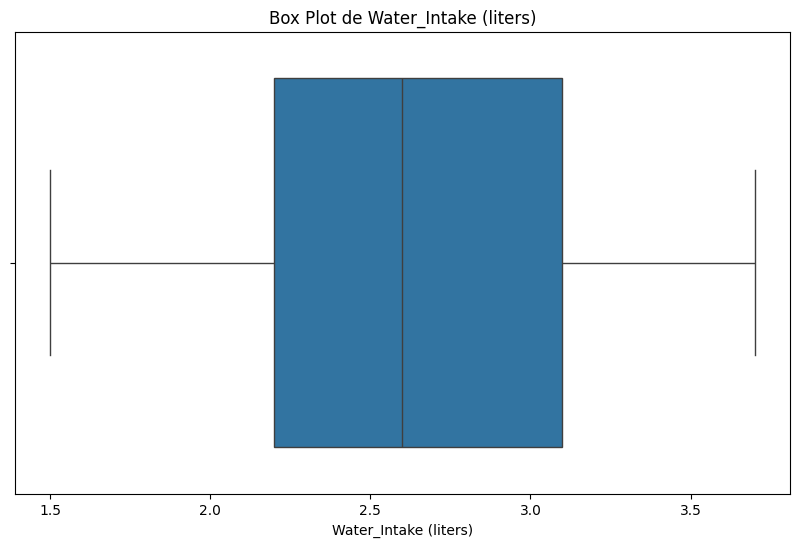

Valores atípicos en Water_Intake (liters):
Series([], Name: Water_Intake (liters), dtype: float64)



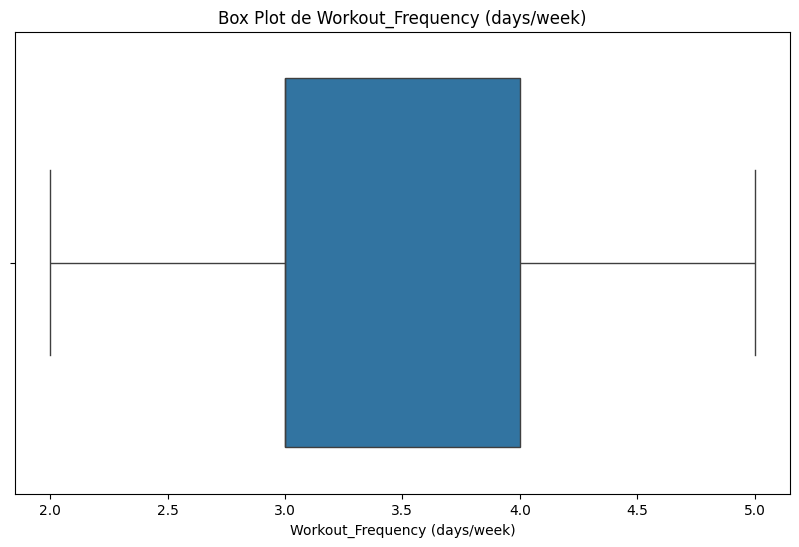

Valores atípicos en Workout_Frequency (days/week):
Series([], Name: Workout_Frequency (days/week), dtype: int64)



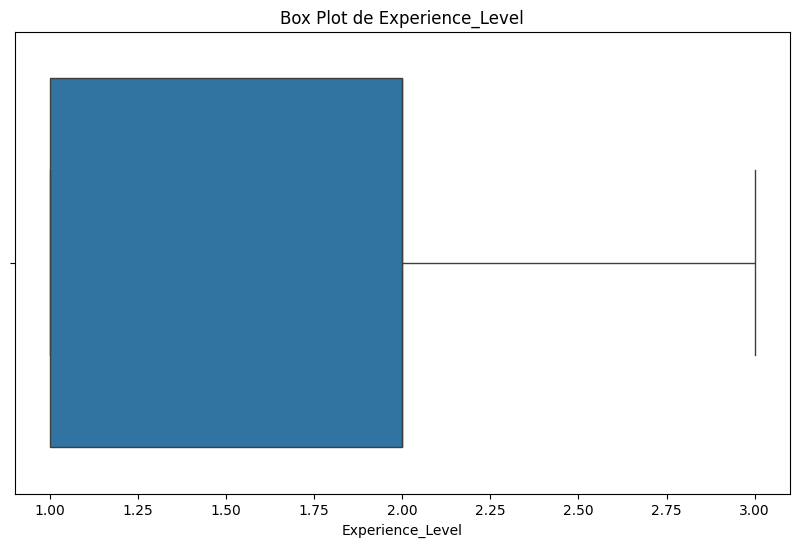

Valores atípicos en Experience_Level:
Series([], Name: Experience_Level, dtype: int64)



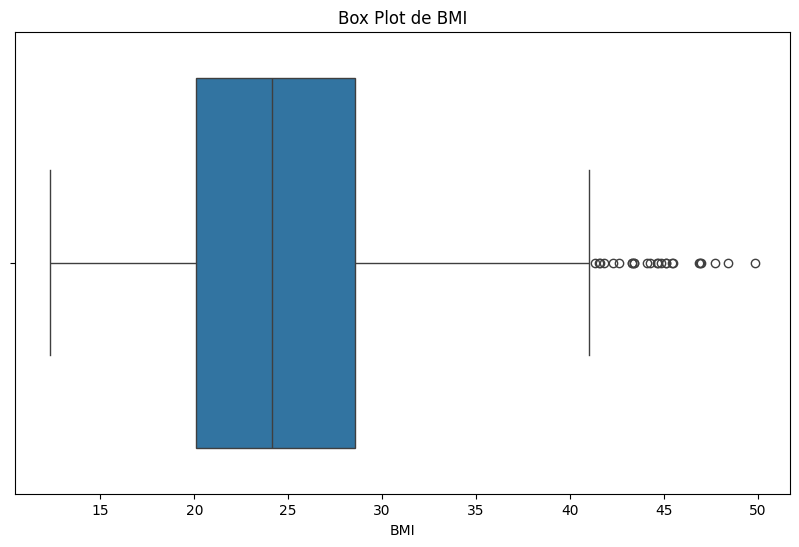

Valores atípicos en BMI:
Age
41    43.31
57    43.40
26    42.63
23    44.84
21    45.43
33    45.14
57    47.72
55    45.49
36    43.31
43    44.71
33    41.60
34    46.90
36    42.30
55    43.40
36    41.84
18    45.14
38    46.98
51    41.34
59    44.26
48    49.84
47    46.94
22    41.56
18    44.10
54    44.66
35    48.43
Name: BMI, dtype: float64



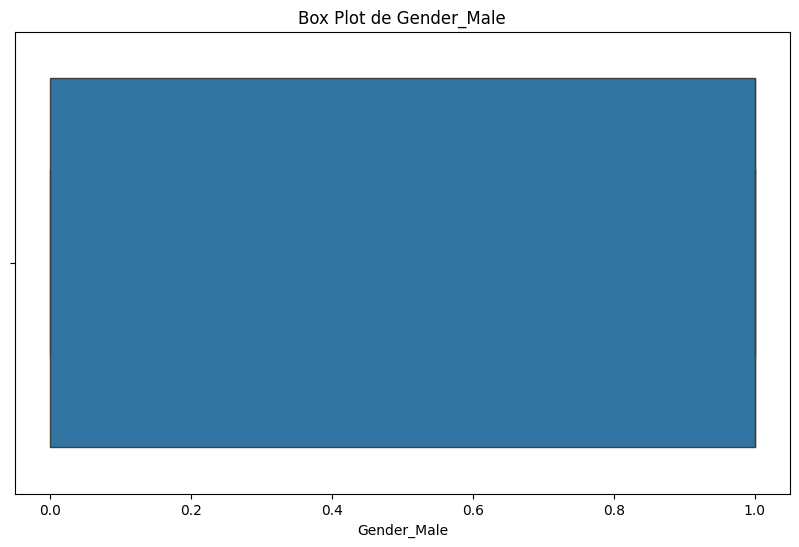

Valores atípicos en Gender_Male:
Series([], Name: Gender_Male, dtype: int32)



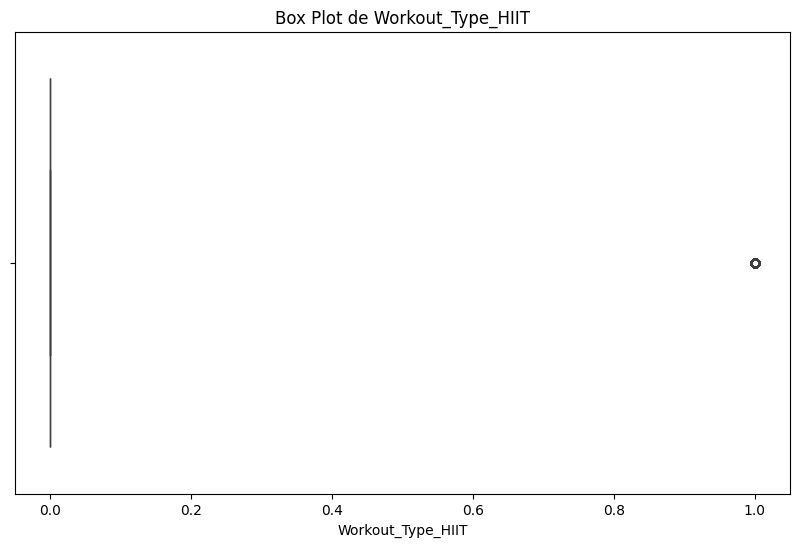

Valores atípicos en Workout_Type_HIIT:
Age
46    1
56    1
41    1
53    1
41    1
     ..
42    1
50    1
57    1
23    1
32    1
Name: Workout_Type_HIIT, Length: 221, dtype: int32



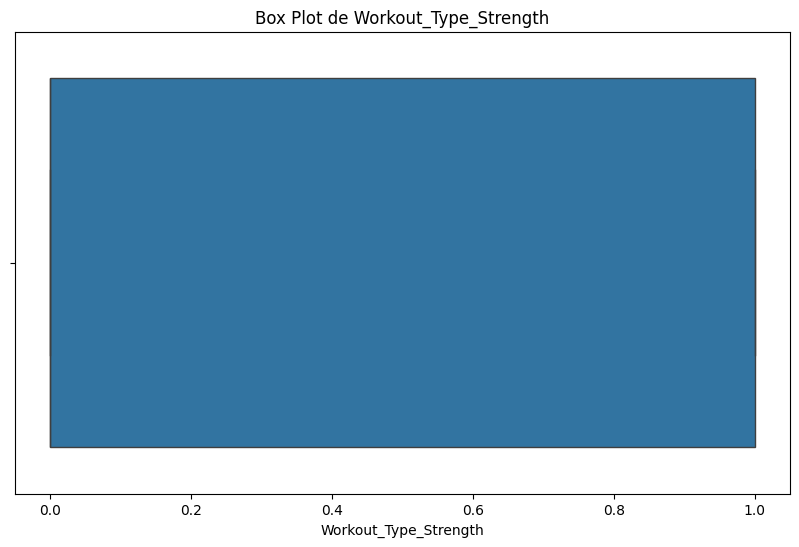

Valores atípicos en Workout_Type_Strength:
Series([], Name: Workout_Type_Strength, dtype: int32)



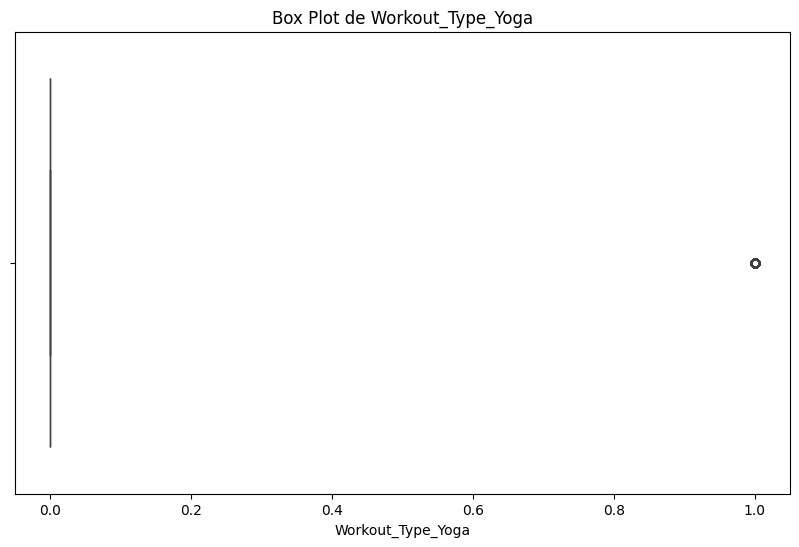

Valores atípicos en Workout_Type_Yoga:
Age
56    1
20    1
50    1
29    1
42    1
     ..
31    1
50    1
31    1
23    1
20    1
Name: Workout_Type_Yoga, Length: 239, dtype: int32



In [12]:
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot de {col}')
    plt.xlabel(col)
    plt.show()

    # Calcular valores atípicos utilizando IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Valores atípicos en {col}:')
    print(outliers[col])
    print()

In [ ]:
variables = ['BMI', 'Calories_Burned', 'Weight (kg)']

# Función para contar valores atípicos
def contar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    atipicos = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    return len(atipicos)


# Contar valores atípicos para cada variable
valores_atipicos = {columna: contar_valores_atipicos(df, columna) for columna in variables}

# Mostrar el número de valores atípicos
valores_atipicos

{'BMI': 25, 'Calories_Burned': 10, 'Weight (kg)': 9}

Los valores atípicos están únicamente presentes en estas variables:
- IBM: variable con la mayor cantidad, teniendo más del doble a la siguiente variable, 25.
- Calories_burned: 10 valores atípicos.
- Weight: 9 valores atípicos

#### Matriz de correlación: 


Hay que eliminar antes los datos atípicos

In [14]:
# Eliminación de los datos atípicos

# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Función para eliminar valores atípicos
def eliminar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    # Aplicamos un filtro para no devolver los datos por debajo y por arriba
    filtro = (df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR))
    return df[filtro]

# Eliminar valores atípicos para todas las columnas numéricas
for columna in columnas_numericas:
    df = eliminar_valores_atipicos(df, columna)

# Mostrar las primeras filas del DataFrame para verificar la eliminación
df.head()

,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
Age,,,,,,,,,,,,,,,,
56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,0,0,1
32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0,0,0
25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,0,1,0
38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,0,1,0
36,70.3,1.72,174,169,73,1.49,1385.0,21.3,2.3,3,2,23.76,1,0,0,0


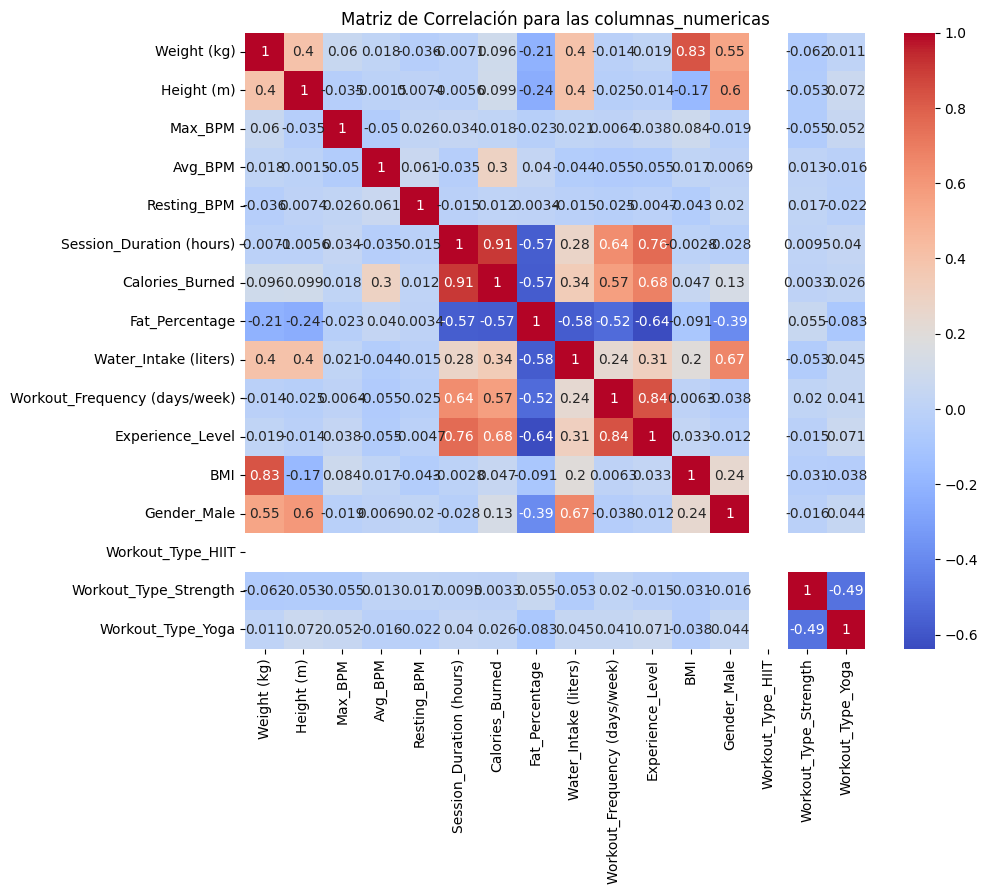

In [15]:
# Calcular la matriz de correlación para las columnas_numericas
corr_matrix = df[columnas_numericas].corr()

# Mostrar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('Matriz de Correlación para las columnas_numericas')
plt.show()

Conclusiones clave del gráfico:

1. **Peso (Weight)** y **IMC (BMI)** tienen una fuerte correlación positiva (0.83). Esto tiene sentido, ya que el IMC depende del peso.

2. **Calorías quemadas (Calories Burned)** y **duración de la sesión (Session Duration)** están altamente correlacionadas (0.91). Cuanto más larga es la sesión, más calorías se queman.

3. **Frecuencia de ejercicio (Workout Frequency)** y **nivel de experiencia (Experience Level)** están positivamente correlacionadas (0.84). Esto sugiere que las personas con más experiencia suelen entrenar con mayor frecuencia.

4. **Porcentaje de grasa (Fat Percentage)** tiene una correlación negativa moderada con **frecuencia de ejercicio (-0.53)** y **nivel de experiencia (-0.65)**. Esto sugiere que aquellos que entrenan más frecuentemente o tienen más experiencia tienden a tener un porcentaje de grasa corporal menor.

5. **Duración de la sesión** y **frecuencia de ejercicio** también están correlacionadas positivamente (0.65), lo que indica que quienes entrenan más días por semana también tienden a tener sesiones más largas.

6. **Frecuencia de ejercicio** y **calorías quemadas** tienen una correlación positiva (0.57), lo cual indica que quienes entrenan más frecuentemente también queman más calorías en general.

7. **Peso (Weight)** y **ingesta de agua (Water Intake)** tienen una correlación positiva moderada (0.41), lo que sugiere que las personas con mayor peso tienden a consumir más agua.






#### Eliminación de variables que no resultan significativas

A continuación, se hará un análisis de cada una de las correlaciones, para indicar qué variables se mantendrán y cuales se eliminarán. 

1. Peso y IMC:
    - El IMC depende del peso y la altura, se puede eliminar el IMC.
    - Usando el peso se puede ser más directo que usar una variable que es, en realidad, el resultado de una operación entre otras dos variables del dataset.
2. Calorías quemadas y duración de la sesión.
    - Dado que calorías quemadas es la variable objetivo, no se va a eliminar.
    - Además, se mantendrá la duración de la sesión por ser una variable interesante. Así, el modelo se verá bastante influenciado por esta variable a la hora de realizar las predicciones, antes que otras como podría ser la ingesta de agua.
3. Frecuencia de ejercicio y nivel de experiencia.
    - Se mantendrá la frecuencia de ejercicio por ser más relevante a la hora de predecir las calorías quemadas
4. Porcentaje de grasa.
    - Se trata de una variable con correlaciones negativa, que resulta interesante mantener por ser independiente para evaluar la composición corporal.
5. Frecuencia de ejercicio y duración de la sesión:
    - Se mantendrán ambas, por ser bastante importantes a la hora de realizar predicciones sobre las calorías quemadas. Aunque presenten una correlación alta, es recomendable mantenerla para que el modelo se vea algo más influenciado por estas variables a la hora de realizar las preddiciones.

6. Ingesta de agua:
    - Se eliminará la ingesta de agua por no ser muy representativo a la hora de predecir la quema de calorías.


7. Antiguas variables categóricas:
    - Todas las variables categóricas van a ser eliminadas por tener valores nada significativos, estando todas por debajo del 0.05

8. Pulsaciones por minuto:
    - Tan solo se dejará la media de pulsaciones, puesto que tener el máximo y el mínimo cuando existe este tipo de columna tan solo añade complejidad a la cantidad de datos a procesar por el modelo, pero sin percibir apenas mejora en este.

In [16]:
#Eliminar las columnas especificadas
columnas_a_eliminar = ['Height (m)','BMI','Experience_Level', 
                       'Water_Intake (liters)', 'Workout_Type_HIIT', 'Workout_Type_Strength', 
                       'Workout_Type_Yoga', 'Gender_Male', 'Max_BPM', 'Resting_BPM']
df = df.drop(columns=columnas_a_eliminar)


# Crear un nuevo DataFrame con las columnas restantes
nuevas_columnas_numericas = df.select_dtypes(include=[np.number])

# Mostrar las primeras filas del nuevo DataFrame
nuevas_columnas_numericas.head()

,Weight (kg),Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week)
Age,,,,,,
56,88.3,157,1.69,1313.0,12.6,4
32,68.1,122,1.11,677.0,33.4,4
25,53.2,164,0.59,532.0,28.8,3
38,46.1,158,0.64,556.0,29.2,3
36,70.3,169,1.49,1385.0,21.3,3


#### Análisis por variable

In [17]:
# Crear un DataFrame para almacenar los resultados por variable
resultados_por_variable = []

# Analizar cada variable
for var in nuevas_columnas_numericas:
    analisis = {
        'Variable': var,
        'Media': df[var].mean(),
        'Mediana': df[var].median(),
        'Desviacion Estandar': df[var].std(),
        'Valor Minimo': df[var].min(),
        'Valor Maximo': df[var].max()
    }
    resultados_por_variable.append(analisis)

# Convertir los resultados a un DataFrame
resultados_por_variable_df = pd.DataFrame(resultados_por_variable)

# Mostrar los resultados
print("Análisis por Variable:")
print(resultados_por_variable_df)

Análisis por Variable:
                        Variable       Media  Mediana  Desviacion Estandar  \
0                    Weight (kg)   71.814563    68.70            19.427960   
1                        Avg_BPM  143.493759   143.00            14.313951   
2       Session_Duration (hours)    1.245867     1.25             0.345027   
3                Calories_Burned  893.429958   884.00           264.525163   
4                 Fat_Percentage   25.267822    26.50             6.129495   
5  Workout_Frequency (days/week)    3.309293     3.00             0.911369   

   Valor Minimo  Valor Maximo  
0          40.0        127.50  
1         120.0        169.00  
2           0.5          1.99  
3         303.0       1598.00  
4          10.0         35.00  
5           2.0          5.00  


#### Estandarización y normalización de los datos


In [18]:
# Estandarización
features = nuevas_columnas_numericas

scaler_standard = StandardScaler()
features_standardized = scaler_standard.fit_transform(features)
df_standardized = pd.DataFrame(features_standardized, columns=features.columns)

# Mostrar los resultados de la estandarización
print("Estandarización:")
print(df_standardized.head())

Estandarización:
   Weight (kg)   Avg_BPM  Session_Duration (hours)  Calories_Burned  \
0     0.849131  0.944227                  1.288136         1.587226   
1    -0.191329 -1.502637                 -0.394060        -0.818751   
2    -0.958798  1.433600                 -1.902236        -1.367283   
3    -1.324504  1.014137                 -1.757219        -1.276492   
4    -0.078012  1.783152                  0.708069         1.859601   

   Fat_Percentage  Workout_Frequency (days/week)  
0       -2.068134                       0.758405  
1        1.327650                       0.758405  
2        0.576659                      -0.339607  
3        0.641963                      -0.339607  
4       -0.647782                      -0.339607  


In [19]:
# Normalización

scaler_minmax = MinMaxScaler()
features_normalized = scaler_minmax.fit_transform(features)
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Mostrar los resultados de la normalización
print("Normalización:")
print(df_normalized.head())

Normalización:
   Weight (kg)   Avg_BPM  Session_Duration (hours)  Calories_Burned  \
0     0.552000  0.755102                  0.798658         0.779923   
1     0.321143  0.040816                  0.409396         0.288803   
2     0.150857  0.897959                  0.060403         0.176834   
3     0.069714  0.775510                  0.093960         0.195367   
4     0.346286  1.000000                  0.664430         0.835521   

   Fat_Percentage  Workout_Frequency (days/week)  
0           0.104                       0.666667  
1           0.936                       0.666667  
2           0.752                       0.333333  
3           0.768                       0.333333  
4           0.452                       0.333333  


#### Creación de csv con los nuevos datos
A continuación, se creará un nuevo dataset con los datos procesados.



In [20]:
# Guardar el DataFrame procesado en un archivo CSV
df.to_csv('ple02_gimnasio_procesados.csv', index=False)
print("Archivo CSV 'ple02_gimnasio_procesados.csv' creado exitosamente.")

Archivo CSV 'ple02_gimnasio_procesados.csv' creado exitosamente.


#### Partición del conjunto de datos
Partición del conjunto de datos en entrenamiento y test.

Este punto se realizará en el notebook siguiente. De esta forma, no se tendrán que exportar la partición de los datos a un nuevo notebook, si no que se realizan las tareas propias del modelo en un notebook diferente.

De esta forma, se posee un primer notebook con todo el análisis y procesamiento previo de los datos